# Ultra Wide Band positioning literature analysis 

The real case for analyzing UWB indoor positioning system literature

 - 115 journal articles from years 2019-2021 matching search terms "UWB positioning" were downloaded from IEEE explorer as PDF and converted to plain text using pdftotext in linux.

In [16]:
# Standard libraries to be used
import glob
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# A regular experssion library. This is very usefull for text processing
import re

# Import the NLTK library
import nltk
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk import FreqDist

import gensim
from gensim import corpora
import pyLDAvis
from pyLDAvis import gensim_models

## Import corpus

In [3]:
lemmatizer = WordNetLemmatizer()
#stop_words_fin = set(stopwords.words("finnish"))
stop_words = set(stopwords.words("english"))


# A real case, 115 recent research journal articles about "UWB positioning" from IEEE Explorer
# Bulk downloaded PDF's and converted to text with pdftotext
filenames=[fn.split('/')[-1] for fn in glob.glob('corpus_txt/*.txt')]
uwb=PlaintextCorpusReader('corpus_txt/', filenames)
punctuations=set([',','.','!','?','@', '%', ':', ';'])
morewords=set(['ieee', 'transaction', 'journal', 'vol'])
unnecessary=stop_words.union(punctuations).union(morewords)

In [5]:
docs=[]
words=[]
for document in uwb.fileids():
    tokens = gensim.utils.simple_preprocess(uwb.raw(document))
    meaningful_words = [word for word in tokens if word not in unnecessary]
    lemmatized = [lemmatizer.lemmatize(word) for word in meaningful_words]
    docs.append(lemmatized)
    words.extend(lemmatized)
print(len(docs))
for i in range(5):
    print(i, docs[i][:10])

115
0 ['transaction', 'geoscience', 'remote', 'sensing', 'february', 'sar', 'processing', 'without', 'motion', 'measurement']
1 ['sensor', 'august', 'high', 'accuracy', 'indoor', 'localization', 'system', 'application', 'based', 'tightly']
2 ['transaction', 'cybernetics', 'june', 'ultra', 'wideband', 'odometry', 'based', 'cooperative', 'relative', 'localization']
3 ['microwave', 'wireless', 'component', 'letter', 'november', 'ir', 'uwb', 'angle', 'arrival', 'sensor']
4 ['antenna', 'wireless', 'propagation', 'letter', 'march', 'position', 'information', 'indexed', 'classifier', 'improved']


In [6]:
text = nltk.Text(words)

In [7]:
dictionary = corpora.Dictionary(docs)

In [8]:
text.concordance('csi')

Displaying 25 of 48 matches:
ation using interpolated preprocessed csi phase bayesian tracking sensor may sh
rcher using channel state information csi rtt wi fi angle arrival aoa ble promo
 communication exploiting statistical csi trans veh technol pp aug huang zappon
ient like dementia technique like gps csi mobile application video image proces
ystem using channel state information csi contains line phase training line pha
tomat icra may pp wang gao mao pandey csi based fingerprinting indoor localizat
pectively co sin bi di sin co asi bsi csi dsi co si sin abcd matrix analysis fi
 wu pila sub meter localization using csi commodity wi fi device sensor oct lop
on ii discus different technique rssi csi aoa tof tdoa rtof poa localization se
x algorithm channel state information csi many wireless system uwb coherence ba
upper layer channel state information csi higher granularity r capture amplitud
smitter receiver antenna pair general csi complex quantity written polar form f
ngerprint f

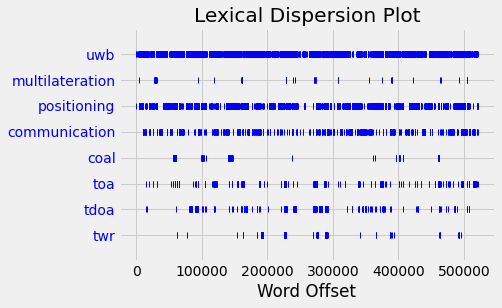

In [9]:
text.dispersion_plot(['uwb', 'multilateration', 'positioning', 'communication', 'coal', 'toa', 'tdoa', 'twr'])

In [11]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
corpus[1][:5]

Number of unique tokens: 20396
Number of documents: 115


[(3, 1), (6, 1), (7, 1), (9, 32), (10, 5)]

In [12]:
temp = dictionary[0] 

In [19]:
# Latent Dirichlet Allocation
id2word = dictionary.id2token
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=2000,
                                           passes=10,
                                           alpha='auto',
                                           eta = 'auto',
                                           iterations=100,
                                           eval_every=1)

In [20]:
pyLDAvis.enable_notebook()
vis = gensim_models.prepare(lda_model, corpus, dictionary);

/home/petri/venv/python3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [21]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.070121  0.015074       1        1  42.972789
2      0.041363  0.039301       2        1  17.169429
1      0.039767  0.010642       3        1  15.490897
0     -0.017474 -0.101489       4        1  14.516792
3     -0.133777  0.036472       5        1   9.850093, topic_info=             Term         Freq        Total Category  logprob  loglift
56        antenna  1951.000000  1951.000000  Default  30.0000  30.0000
81          array   637.000000   637.000000  Default  29.0000  29.0000
1119       target  1096.000000  1096.000000  Default  28.0000  28.0000
434           fig  3499.000000  3499.000000  Default  27.0000  27.0000
885         radar   775.000000   775.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1188        using   170.590110  2266.736738   Topic5  -5.7070  -0.2691
687   measurement   178.771447  3184.423284   Topic5  -5.6602  -0.5622
1113       system   181.731371  4639.977888   Topic5  -5.6437  -0.9222
799     parameter   146.256477   927.707453   Topic5  -5.8609   0.4703
1020       signal   149.550730  2565.528486   Topic5  -5.8386  -0.5246

[435 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
5          1  0.822268  acceleration
5          2  0.070931  acceleration
5          3  0.097201  acceleration
5          4  0.007881  acceleration
5          5  0.002627  acceleration
...      ...       ...           ...
11866      1  0.090730            φk
11866      2  0.051846            φk
11866      4  0.038884            φk
11866      5  0.816572            φk
5726       1  0.978154            ωt

[1009 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 4])

## Features and clustering

 1. The document is first transformed to the feature space using TFIDF transformation
 1. Then a Kmeans clustering is used for finding topic clusters from corpus
 
Kmeans i good choice for classification when the amount of samples and features is large, since kMeans is simple and fast.

TFIDF=Term Frequency vs Inverse Document Frequency

In [22]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

uwbdictionary = Dictionary(docs)
tfidf_model = TfidfModel(dictionary=uwbdictionary)


In [23]:
# Transformed corpus
tform_corpus = tfidf_model[corpus]


In [24]:
# Create sparse matrix (sparse form of the design matrix)
sparse = gensim.matutils.corpus2csc(tform_corpus)


In [34]:
# Make it to normal matrix (Dense desigh matrix)
X = sparse.toarray().transpose()
X.shape


(115, 20396)

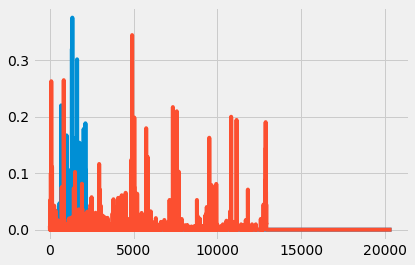

In [46]:
# Which words are used by the first and the 50th doc in corpus 
plt.plot(X[[1,50],:].T)

accelerate


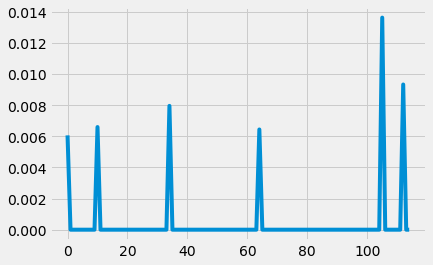

In [53]:
# Show the frequency of using the word accelerate in different documents
print(dictionary[4])
plt.plot(X[:,4])

### Kmeans clustering

In [54]:
from sklearn.cluster import KMeans
kmodel = KMeans(n_clusters=10)

kmodel.fit(X)

clusters = kmodel.labels_.tolist()

In [56]:
centroids = kmodel.cluster_centers_.argsort()[:, ::-1] # Sort the words according to their importance.

for i in range(10):
    j=i+1
    print("Cluster %d words:" % j, end='')
    for ind in centroids[i, :10]:
        print(' %s' % dictionary.id2token[ind],end=',')
    print()

Cluster 1 words: rha, body, anc, particle, qlos, shadowing, chest, nlos, aembpf, pf,
Cluster 2 words: in, pedestrian, imu, nlos, gnss, b, station, ij, vehicle, skf,
Cluster 3 words: classification, classifier, radar, character, wandering, ghost, rsnrtf, dementia, target, doppler,
Cluster 4 words: pdoa, pulse, tdc, tag, agv, lte, rx, transmitter, rfid, agvs,
Cluster 5 words: στ, b, pl, link, limb, body, wearable, sl, activity, breathing,
Cluster 6 words: cnn, lstm, cir, deeptal, gru, dln, mwt, nlos, layer, convolutional,
Cluster 7 words: twr, agent, clock, altds, parent, packet, node, tdoa, throughput, uncalibrated,
Cluster 8 words: array, antenna, slot, vivaldi, gm, cp, polarization, tsa, reflector, uhf,
Cluster 9 words: pdr, anchor, nlos, capsule, heading, ape, acceleration, ipda, usv, dropout,
Cluster 10 words: shearer, gmm, coal, robot, imm, anchor, ian, mine, wca, vio,


In [77]:
# Find the membership of a certain article
docid=4
print("Cluster %d, filename: %s" %(clusters[docid], filenames[docid]))


Cluster 2, filename: Position-Information-Indexed Classifier for Improved Through-Wall Detection and Classification of Human Activities Using UWB Bio-Radar.txt


## Latent Semantic Indexing
Another method of getting topics is the Latent Semantic Indexing

In [78]:
## Latent Semantic Indexing

from gensim.test.utils import common_dictionary, common_corpus
from gensim.models import LsiModel
n_topics=10
lsi = LsiModel(corpus=corpus, id2word=uwbdictionary.id2token, num_topics=n_topics)


In [79]:
# What words defines a topic?
lsi.show_topic(1)

[('localization', 0.4875349148913273),
 ('positioning', -0.2909763458811148),
 ('uwb', -0.2575512667618097),
 ('user', 0.24188446635670657),
 ('error', -0.23932395156138705),
 ('device', 0.2275846558138512),
 ('system', 0.15292815029909418),
 ('location', 0.13571514203962662),
 ('iot', 0.1332547423389989),
 ('indoor', 0.12787555538465106)]

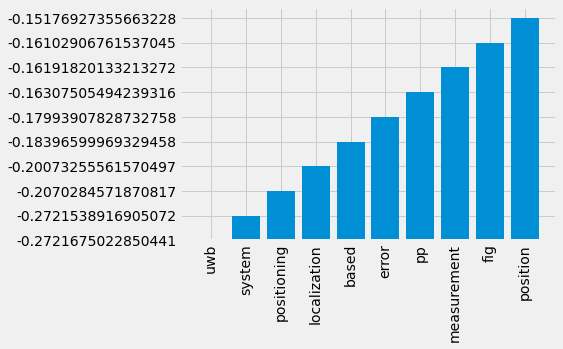

In [311]:
topicno=0
v=np.array(lsi.show_topic(topicno))
plt.bar(x=v[:,0], height=v[:,1], )
plt.xticks(rotation=90);

In [81]:
# Check the membership of an article to the topics
lsi[corpus[2]]

[(0, -163.16463814559444),
 (1, -25.30867785526491),
 (2, -19.632380405044618),
 (3, -83.97862682677317),
 (4, -16.21218983355262),
 (5, 11.791163084369556),
 (6, 25.61561916998633),
 (7, -0.2888894864496113),
 (8, 2.5825827845733342),
 (9, 54.64331262974893)]

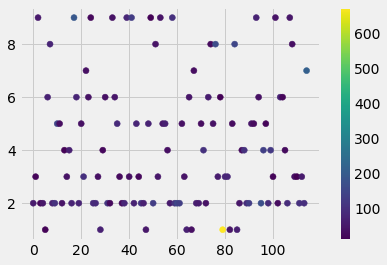

In [60]:
# Find the most probable membership of all articles
N=115
v=np.zeros(N)
c=np.zeros(N)
for i in range(N):
    x=np.array(lsi[corpus[i]])[:,1]
    j=x.argmax()
    v[i]=j
    c[i]=x[j]
plt.scatter(range(N),v,c=c)
plt.colorbar()

In [61]:
# Find documents which highest membership probability = good examples of topics
for i in range(len(filenames)):
    if c[i]>125:
        print(i, v[i], c[i], filenames[i])


10 5.0 144.3401299127132 PDR-UWB Based Positioning of a Shopping Cart.txt
17 9.0 187.91504111738914 Anchor Calibration for Real-Time-Measurement Localization Systems.txt
41 9.0 126.9637637961244 Peer-to-Peer Relative Localization of Aerial Robots With Ultrawideband Sensors.txt
50 2.0 130.15121261806388 Planar Ultra-Wideband and Wide-Scanning Dual-Polarized Phased Array With Integrated Coupled-Marchand Balun for High Polarization Isolation and Low Cross-Polarization.txt
60 2.0 149.78166430274806 Generalization of Channel Micro-Doppler Capacity Evaluation for Improved Finer-Grained Human Activity Classification Using MIMO UWB Radar.txt
61 2.0 131.55676936576754 UWB Simultaneous Breathing and Heart Rate Detections in Driving Scenario Using Multi-Feature Alignment Two-Layer EEMD Method.txt
76 8.0 163.7418920112681 Single-Anchor Positioning Multipath Processing With Non-Coherent Directional Measurements.txt
79 1.0 674.8681255660538 A Survey of Indoor Localization Systems and Technologies.tx

In [62]:
# Find samples from each topic, which has the highest membership probability = Best sample of each topic
print("Topic, Membership: filename=title")
idx=np.arange(len(v))
for i in range(1,n_topics):
    j = idx[v==i]
    if len(j)>0:
        k = j[np.argmax(c[j])]
        print("%2d, %3.0f: %s " % (i, c[k], filenames[k]))
    else:
        print(i)


Topic, Membership: filename=title
 1, 675: A Survey of Indoor Localization Systems and Technologies.txt 
 2, 167: Experimental Analysis of Ultra-Wideband Body-to-Body Communication Channel Characterization in an Indoor Environment.txt 
 3, 101: Analysis of the Applicability of Dilution of Precision in the Base Station Configuration Optimization of Ultrawideband Indoor TDOA Positioning System.txt 
 4, 135: Stochastic Data Association for Multipath Assisted Positioning Using a Single Transmitter.txt 
 5, 144: PDR-UWB Based Positioning of a Shopping Cart.txt 
 6,  77: A Low-Cost INS and UWB Fusion Pedestrian Tracking System.txt 
 7, 210: BLAS Broadcast Relative Localization and Clock Synchronization for Dynamic Dense Multiagent Systems.txt 
 8, 164: Single-Anchor Positioning Multipath Processing With Non-Coherent Directional Measurements.txt 
 9, 188: Anchor Calibration for Real-Time-Measurement Localization Systems.txt 
